<a href="https://colab.research.google.com/github/dhaferasil/DSAI/blob/main/Med_Dhafer_Asil_DSAI_project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

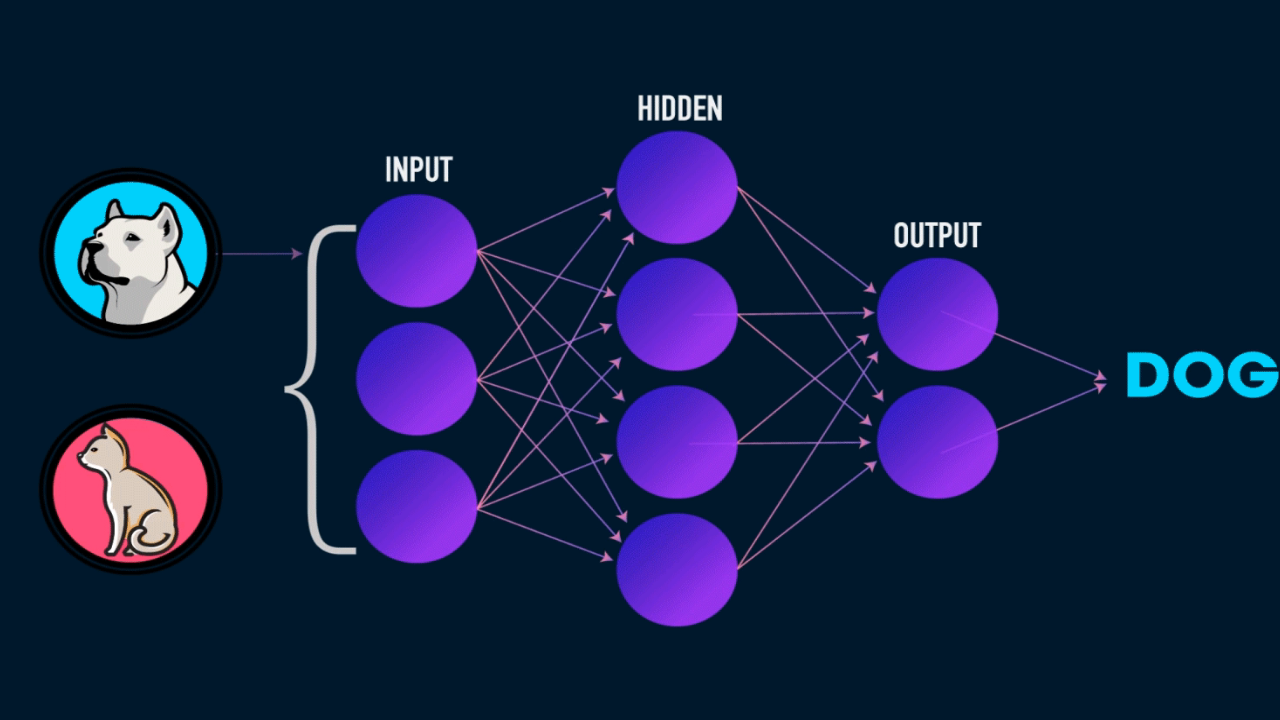

In [ ]:
import numpy as asilnp
import matplotlib.pyplot as asilplt
import matplotlib.image as asilimg

In [ ]:
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O /home/asil/cats_and_dogs_filtered.zip

--2024-01-06 11:14:59--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.12.207, 172.217.194.207, 142.250.4.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.12.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/home/asil/cats_and_dogs_filtered.zip’

/home/asil/cats_and 100%[===================>]  65.43M  20.1MB/s    in 3.8s    

2024-01-06 11:15:03 (17.3 MB/s) - ‘/home/asil/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
import os
import zipfile

local_zip = '/home/asil/cats_and_dogs_filtered.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/home/asil')
zip_ref.close()

In [ ]:
base_dir = '/home/asil/cats_and_dogs_filtered'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

#repertoires avec nos photos(d'entrainement) de chiens et de chats
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

#repertoires avec nos photos(de validation) de chiens et de chats
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [ ]:
train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )

print(train_cat_fnames[:11])
print(train_dog_fnames[:12])

['cat.98.jpg', 'cat.9.jpg', 'cat.310.jpg', 'cat.62.jpg', 'cat.461.jpg', 'cat.299.jpg', 'cat.422.jpg', 'cat.892.jpg', 'cat.939.jpg', 'cat.989.jpg', 'cat.394.jpg']
['dog.531.jpg', 'dog.510.jpg', 'dog.955.jpg', 'dog.824.jpg', 'dog.522.jpg', 'dog.82.jpg', 'dog.487.jpg', 'dog.304.jpg', 'dog.138.jpg', 'dog.622.jpg', 'dog.408.jpg', 'dog.185.jpg']


In [ ]:
print('total training cat images :', len(os.listdir(      train_cats_dir ) ))
print('total training dog images :', len(os.listdir(      train_dogs_dir ) ))

print('total validation cat images :', len(os.listdir( validation_cats_dir ) ))
print('total validation dog images :', len(os.listdir( validation_dogs_dir ) ))

total training cat images : 1000
total training dog images : 1000
total validation cat images : 500
total validation dog images : 500


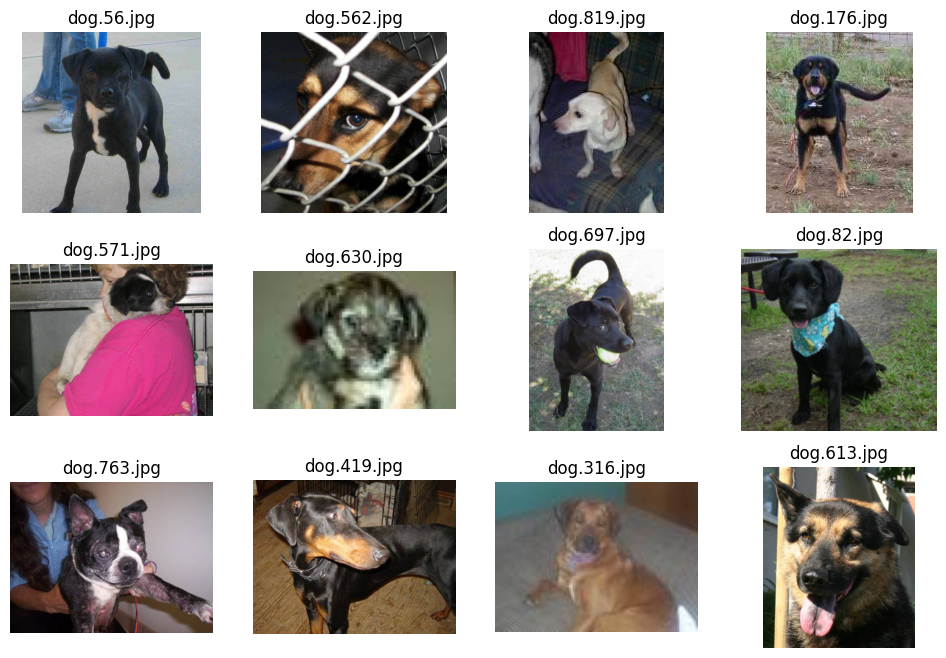

In [ ]:
samples_dogs = asilnp.random.choice(os.listdir(train_dogs_dir),size = 12)

asilplt.figure(figsize = (12,8))
for i,dog in enumerate(samples_dogs):
    ax = asilplt.subplot(3,4,i+1)
    img = asilimg.imread(os.path.join(train_dogs_dir,dog))
    asilplt.axis("off")
    asilplt.imshow(img)
    ax.set_title(dog)

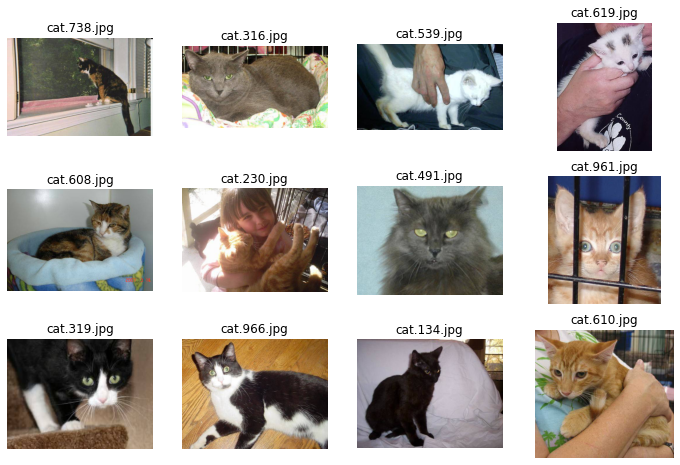

In [ ]:
samples_cats = np.random.choice(os.listdir(train_cats_dir),size = 12)
plt.figure(figsize = (12,8))
for i,cat in enumerate(samples_cats):
    ax = plt.subplot(3,4,i+1)
    img = mpimg.imread(os.path.join(train_cats_dir,cat))
    plt.axis("off")
    plt.imshow(img)
    ax.set_title(cat)

(460, 499, 3)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/255.0)
validation_datagen = ImageDataGenerator(rescale = 1/255.0)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary'
)
# nous avons 1000 images de chiens et milles images de chats donc 2000 au total donc 100 lots de 20 images
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
import tensorflow as asiltf
model = asiltf.keras.models.Sequential([
    asiltf.keras.layers.Conv2D(32,(3,3) ,input_shape = (150,150,3),activation = 'relu'),
    asiltf.keras.layers.MaxPooling2D((2,2)),
    asiltf.keras.layers.Conv2D(64,(3,3) ,activation = 'relu'),
    asiltf.keras.layers.MaxPooling2D((2,2)),
    asiltf.keras.layers.Conv2D(128,(3,3) ,activation = 'relu'),
    asiltf.keras.layers.MaxPooling2D((2,2)),
    asiltf.keras.layers.Conv2D(128,(3,3),activation = 'relu'),
    asiltf.keras.layers.MaxPooling2D((2,2)),

    asiltf.keras.layers.Flatten(),
    asiltf.keras.layers.Dense(512,activation = 'relu'),
    asiltf.keras.layers.Dense(1,activation = 'sigmoid')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [ ]:
model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001),loss='binary_crossentropy',metrics = ['acc'])

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=100,# 2000 images = batch_size * steps
    epochs=10,
    validation_data=validation_generator,
    validation_steps=50 # 1000 images = batch_size * steps
)

Epoch 1/10
100/100 [==============================] - 40s 86ms/step - loss: 0.7647 - acc: 0.5330 - val_loss: 0.6905 - val_acc: 0.5450
Epoch 2/10
100/100 [==============================] - 9s 85ms/step - loss: 0.6871 - acc: 0.5665 - val_loss: 0.6540 - val_acc: 0.6240
Epoch 3/10
100/100 [==============================] - 9s 87ms/step - loss: 0.6317 - acc: 0.6490 - val_loss: 0.6008 - val_acc: 0.6850
Epoch 4/10
100/100 [==============================] - 8s 84ms/step - loss: 0.5897 - acc: 0.6975 - val_loss: 0.5766 - val_acc: 0.7100
Epoch 5/10
100/100 [==============================] - 8s 85ms/step - loss: 0.5647 - acc: 0.7165 - val_loss: 0.6116 - val_acc: 0.6890
Epoch 6/10
100/100 [==============================] - 9s 90ms/step - loss: 0.5112 - acc: 0.7575 - val_loss: 0.5343 - val_acc: 0.7290
Epoch 7/10
100/100 [==============================] - 9s 88ms/step - loss: 0.4699 - acc: 0.7800 - val_loss: 0.6035 - val_acc: 0.7260
Epoch 8/10
100/100 [==============================] - 9s 88ms/step -

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = len(acc)

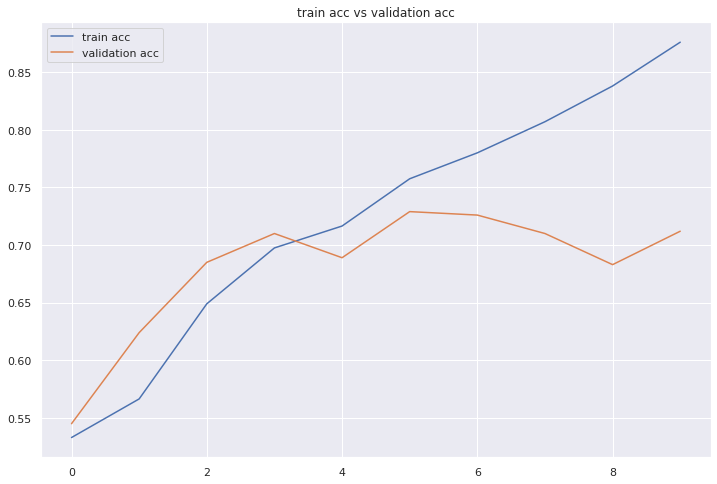

In [ ]:
import seaborn as sns
sns.set()
plt.figure(figsize = (12,8))
plt.plot(np.arange(epochs),acc,label = "train acc")
plt.plot(np.arange(epochs),val_acc,label = "validation acc")
plt.title("train acc vs validation acc")
plt.legend()
plt.show()

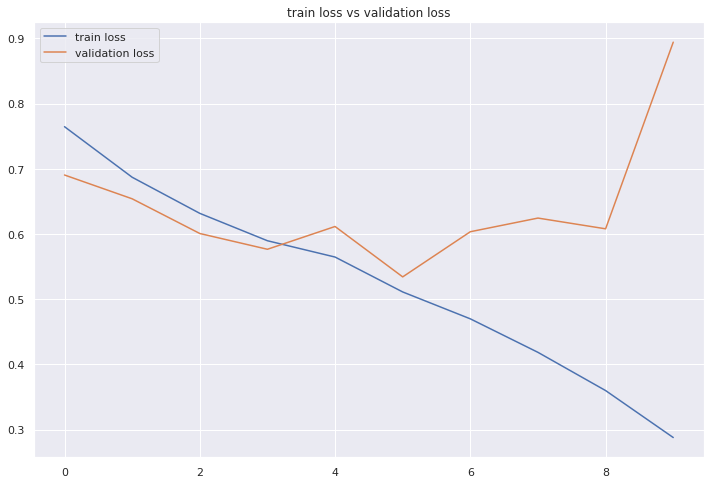

In [ ]:
plt.figure(figsize = (12,8))
plt.plot(np.arange(epochs),loss,label = "train loss")
plt.plot(np.arange(epochs),val_loss,label = "validation loss")
plt.title("train loss vs validation loss")
plt.legend()
plt.show()

# image augmentation

In [ ]:
datagen = ImageDataGenerator(
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')

In [ ]:
from tensorflow.keras.preprocessing import image

sample_cat = np.random.choice(os.listdir(train_cats_dir))
img = image.load_img(os.path.join(train_cats_dir,sample_cat),target_size = (150,150))
x = image.img_to_array(img)
x = x[np.newaxis]

datagen_img = datagen.flow(x,batch_size = 1)

In [ ]:
x.shape

(1, 150, 150, 3)

(-0.5, 149.5, 149.5, -0.5)

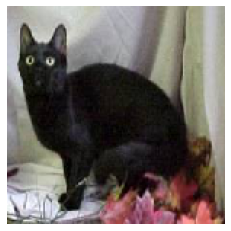

In [ ]:
plt.imshow(img)
plt.axis("off")

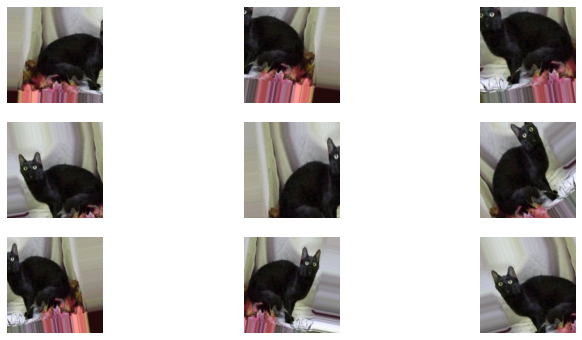

In [ ]:
plt.figure(figsize = (12,6))
for i,batch in enumerate(datagen.flow(x,batch_size = 1)):

    ax = plt.subplot(3,3,i+1)
    plt.imshow(np.squeeze(batch).astype("int64"))
    plt.axis("off")

    if i == 8:
        break
plt.show()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(
    rescale = 1/255.0,
    rotation_range=40, #va faire une rotation de l'image en choissisant un nb aleatoire entre 0 et 40
    width_shift_range=0.2, #va deplacer l'objet de 20% de sa largeur(il peut etre negatif)
    height_shift_range=0.2,
    shear_range=0.2,#va cisailler l'image de 20%
    zoom_range=0.2, # pour zoomer dans l'image de 0 a 0.2
    horizontal_flip=True, #va faire une symetrie de l'image suivant la droite qui passe par le centre de l'image
    fill_mode='nearest' #pour specifier comment arranger l'image vu qu'elle va perdre les px apeès nos operations
)

test_datagen = ImageDataGenerator(rescale = 1/255.0)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary'
)

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3) ,input_shape = (150,150,3),activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64,(3,3) ,activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(128,(3,3) ,activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(128,(3,3),activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(512,activation = 'relu'),
    tf.keras.layers.Dense(1,activation = 'sigmoid')
])

model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001),loss='binary_crossentropy',metrics = ['acc'])
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,# 2000 images = batch_size * steps
    epochs=50,
    validation_data=validation_generator,
    validation_steps=50 # 1000 images = batch_size * steps
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
100/100 [==============================] - 17s 164ms/step - loss: 0.6939 - acc: 0.5220 - val_loss: 0.6840 - val_acc: 0.5330
Epoch 2/50
100/100 [==============================] - 16s 162ms/step - loss: 0.6871 - acc: 0.5375 - val_loss: 0.6695 - val_acc: 0.6060
Epoch 3/50
100/100 [==============================] - 16s 164ms/step - loss: 0.6806 - acc: 0.5680 - val_loss: 0.6686 - val_acc: 0.5530
Epoch 4/50
100/100 [==============================] - 17s 165ms/step - loss: 0.6709 - acc: 0.5885 - val_loss: 0.6573 - val_acc: 0.5750
Epoch 5/50
100/100 [==============================] - 16s 163ms/step - loss: 0.6487 - acc: 0.6230 - val_loss: 0.6280 - val_acc: 0.6340
Epoch 6/50
100/100 [==============================] - 16s 162ms/step - loss: 0.6323 - acc: 0.6445 - val_loss: 0.5893 - val_acc: 0.6770
Epoch 7/50
100/100 [==============================] - 16s 162ms/step - loss: 0.6184 - acc: 0.6605 - val_loss: 0.6202 - val_acc: 0.6410
Epoch 8/50
100/100 [==============================] - 1

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = len(acc)

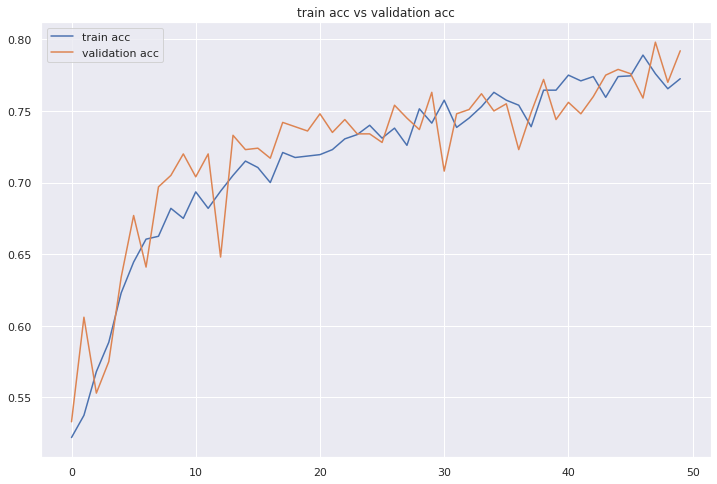

In [ ]:
plt.figure(figsize = (12,8))
plt.plot(np.arange(epochs),acc,label = "train acc")
plt.plot(np.arange(epochs),val_acc,label = "validation acc")
plt.title("train acc vs validation acc")
plt.legend()
plt.show()

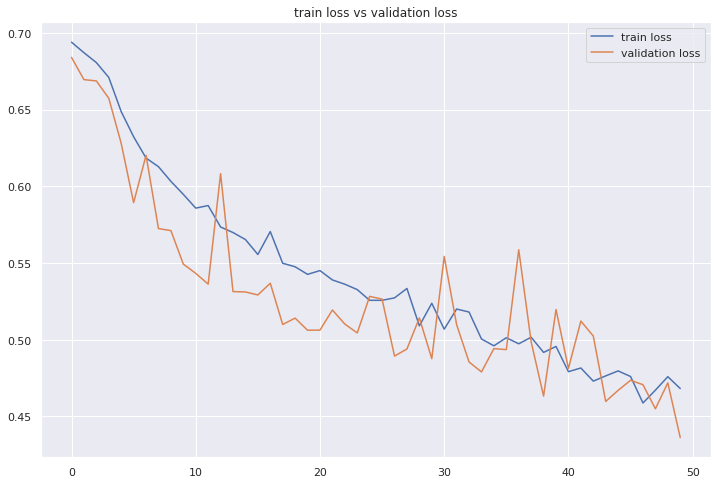

In [ ]:
plt.figure(figsize = (12,8))
plt.plot(np.arange(epochs),loss,label = "train loss")
plt.plot(np.arange(epochs),val_loss,label = "validation loss")
plt.title("train loss vs validation loss")
plt.legend()
plt.show()

# Prediction

In [ ]:
from tensorflow.keras.preprocessing import image
img = image.load_img('/tmp/test/chat2.jpg',target_size = (150,150))
x = image.img_to_array(img)
x = x[np.newaxis]

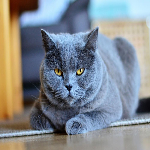

In [ ]:
img

In [ ]:
x.shape

(1, 150, 150, 3)

In [ ]:
model.predict(x)

array([[1.]], dtype=float32)

In [ ]:
train_generator.class_indices

{'cats': 0, 'dogs': 1}